# Numerical Methods


# Lecture 4: Roots of Equations

## Exercise solutions

In [1]:
# some imports we will make at the start of every notebook
# later notebooks may add to this with specific SciPy modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# scipy's optimization
import scipy.optimize as sop

## <span style="color:blue">Exercise 4.1: </span>

Complete the implementation of the method of successive approximations below to solve $x=\mathrm{e}^{-x}$

In [2]:
def picard(f, x, atol=1.0e-6):
    """ Function implementing Picard's method.
    
    f here is the function g(.) described in the lecture and we are solving x = g(x).
    
    x is an initial guess.
    
    atol is a user-defined (absolute) error tolerance.
    """
    # record number of function evaluations so we can later compare methods
    fevals = 0
    # initialise the previous x simply so that while loop argument is initially true
    x_prev = x + 2*atol
    while abs(x - x_prev) > atol:
        x_prev = x
        x = f(x_prev) # one function evaluation
        fevals += 1
        print('Current iteration solution: ',x)
    print('\nPicard used', fevals, 'function evaluations')
    return x



def g(x):
    return np.exp(-x)


print('\nSolution from Picard: ', picard(g, 0.9, atol=1.0e-7))  # 0.9 is our initial guess


# let's check our answer against a SciPy function: sop.newton.
def f(x):
    return x - np.exp(-x)

print('\nCheck this against the solution from SciPy: sop.newton(f, 0.9)=', sop.newton(f, 0.9))

# NB. if we tighten up the atol toelrance in our call to picard the answer gets closer to SciPy 
# but of course takes more iterations.

Current iteration solution:  0.4065696597405991
Current iteration solution:  0.6659307054401221
Current iteration solution:  0.5137951132027094
Current iteration solution:  0.5982209490817094
Current iteration solution:  0.5497888689549504
Current iteration solution:  0.5770716352569477
Current iteration solution:  0.5615403562006408
Current iteration solution:  0.570329875730725
Current iteration solution:  0.5653389163484923
Current iteration solution:  0.5681675528504282
Current iteration solution:  0.566562684236262
Current iteration solution:  0.5674726729169729
Current iteration solution:  0.5669565140929677
Current iteration solution:  0.5672492292377977
Current iteration solution:  0.5670832110967041
Current iteration solution:  0.5671773650126686
Current iteration solution:  0.5671239655566297
Current iteration solution:  0.5671542504764889
Current iteration solution:  0.5671370745155531
Current iteration solution:  0.5671468157234473
Current iteration solution:  0.56714129105


## <span style="color:blue">Exercise 4.2:</span>


Let's consider an example:

$$2\,x + x \, \sin(x-3) = 5\;\;\;\; \text{for}\;\;\;\; x \in (-10,10).$$


By means of visual inspection (i.e. do some plotting) find a subinterval $(a,b)$ such that 


1. there exists an $x^* \in (a,b)$ such that $f(x^*) = 0$, and 


2. $f(x)$ is [monotonic](https://en.wikipedia.org/wiki/Monotonic_function).

Where we define $f$ such that the solution to the above equation is a root - i.e. move all the terms on to one side and set equal to zero. Below we make the choice to define $f$ as $f(x) = 2\,x + x \, \sin(x-3) - 5$.

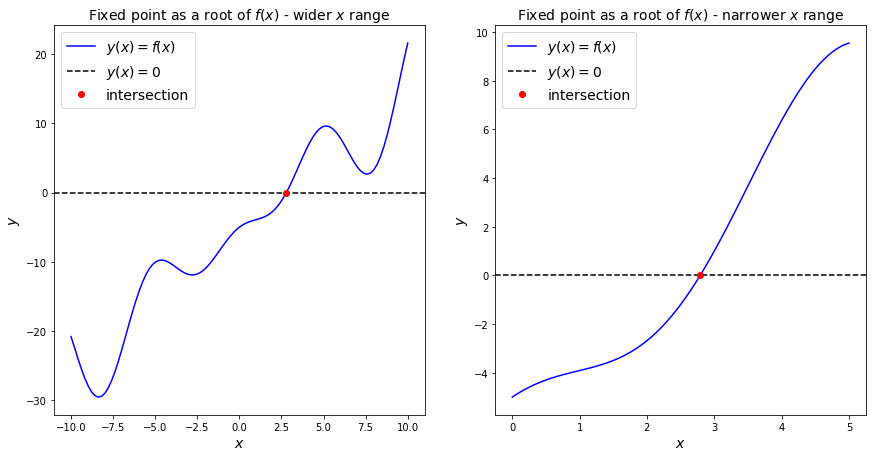

In [3]:
# for this problem we can define f as 5 - (2*x + x*np.sin(x-3)), or (2*x + x*np.sin(x-3)) - 5.
# it makes no difference to the root-finding, just the plots
def f(x):
    return 2*x + x*np.sin(x-3) - 5


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.tight_layout(w_pad=4, h_pad=4)

x = np.linspace(-10. ,10. , 100)
ax1.plot(x, f(x),  'b', label='$y(x) = f(x)$')
xlim = ax1.get_xlim()
ax1.plot([xlim[0], xlim[1]], [0., 0.], 'k--', label='$y(x)=0$')
ax1.plot(2.7903546180675676, 0., 'ro', label='intersection')
ax1.set_xlim(xlim)
ax1.legend(loc='best', fontsize=14)
ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$y$', fontsize=14)
ax1.set_title('Fixed point as a root of $f(x)$ - wider $x$ range', fontsize=14)

x = np.linspace(0., 5., 100)
ax2.plot(x, f(x),  'b', label='$y(x) = f(x)$')
xlim = ax2.get_xlim()
ax2.plot([xlim[0], xlim[1]], [0., 0.], 'k--', label='$y(x)=0$')
ax2.plot(2.7903546180675676, 0., 'ro', label='intersection')
ax2.set_xlim(xlim)
ax2.legend(loc='best', fontsize=14)
ax2.set_xlabel('$x$', fontsize=14)
ax2.set_ylabel('$y$', fontsize=14)
ax2.set_title('Fixed point as a root of $f(x)$ - narrower $x$ range', fontsize=14);

## <span style="color:blue">Exercise 4.3: </span>
    
For $2x + x \mathrm{sin}(x-3) = 5$, use the subinterval $x \in(a,b)$ you found in Exercise 4.2 and complete the code below to implement a root bracketing algorithm. Derive the concept from the Figure above

In [4]:
def f(x):
    return 2*x + x*np.sin(x-3) - 5


def root_bracketing(f, a, b, dx):
    """ Function to perform root bracketing on the function f(.)
    between a and b, with fixed interval size dx.
    Returns the bracket of size dx that contains the root.
    """ 
    # The sign function returns:  -1 if x < 0;  0 if x==0;  1 if x > 0.
    sign = np.sign(f(a))
    while sign == np.sign(f(a)):
        a += dx
        if a >= b:
            raise RuntimeError('no root within [a,b]')
        "important!!"
    return (a-dx, a)


a = 0.
b = 5.
dx = 0.1
# print out the output from our root_bracketing function
print('Bracket = ', root_bracketing(f, a, b, dx))


Bracket =  (2.700000000000001, 2.800000000000001)


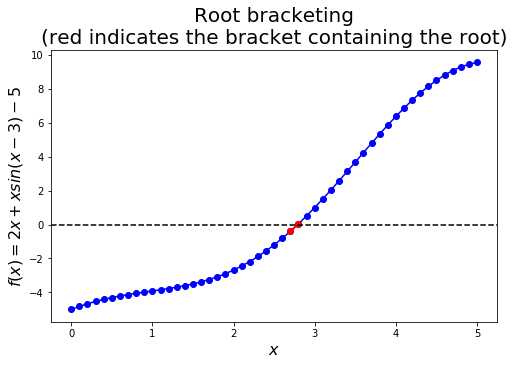

In [5]:
def plot_root_bracketing(f, a, b, dx, ax, xbounds=(-0.1, 1.4), ybounds=(-5, 6), flabel=''):
    x = np.linspace(a, b, int((b-a)/dx)+1)
    y = f(x)
    # plot the sub-intervals in blue
    ax.plot(x, y, 'bo-')
    for i in range(1, len(x)):
        if np.sign(y[i]) != np.sign(y[i-1]):
            # plot the sub-interval where the sign changes in red
            ax.plot([x[i], x[i-1]], [y[i], y[i-1]], 'ro-')
    ax.set_xlabel('$x$', fontsize=16)
    if not flabel:
        fl = '$f(x)$'
    else:
        fl = flabel
    ax.set_ylabel(fl, fontsize=16)
    xlim = ax.get_xlim()
    ax.plot([xlim[0], xlim[1]], [0., 0.], 'k--')
    ax.set_xlim(xlim)
    ax.set_title('Root bracketing\n' + '(red indicates the bracket containing the root)', fontsize=20)

 # let's also use our plotting function from above.
fig, ax1 = plt.subplots(figsize=(8,5))
plot_root_bracketing(f, a, b, 0.1, ax1, flabel=r'$f(x) = 2x + xsin(x-3) - 5$')   

## <span style="color:blue">Exercise 4.4: </span>

For $2x + x \mathrm{sin}(x-3) = 5$, use the subinterval $x \in(a,b)$ you found in Exercise 4.2 and complete the code below to implement a bisection algorithm. Derive the concept from a <a href="https://en.wikipedia.org/wiki/Bisection_method#Algorithm">pseudo-code description</a> and compare the result to `scipy.optimize.bisect`

In [6]:
def bisection(fct, a, b, atol=1.0E-6, nmax=100):
    n = 0
    while n <= nmax:
        c = (a+b)/2.
        if fct(c) == 0. or (b-a)/2. < atol:
            return c
        n += 1
        if np.sign(fct(c)) == np.sign(fct(a)):
            a = c
        else:
            b = c
    raise RuntimeError('no root found within [a,b]')

def f(x):
    return 2*x + x*np.sin(x-3) - 5

a, b = 0., 5.
print(bisection(f, a, b))
print(sop.bisect(f, a, b))

2.790355086326599
2.7903546180675676


## <span style="color:blue">Exercise 4.5: </span>

For $2x + x \mathrm{sin}(x-3) = 5$, use $a$ from the subinterval $x \in(a,b)$ you found in Exercise 4.2 as initial guess $x_0$ and complete the code below to implement a Newton algorithm. Compare the result to [scipy.optimize.newton](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

In [7]:
def newton(f, x0, dfdx, atol=1.0e-6):
    """ Function to implement the Newton-Raphson method
    
    f is the function we are trying to find a root of
    
    and dfdx is another function which return the derivative of f
    """
    x = [x0]
    fevals = 0
    while True:
        x.append(x[-1] - f(x[-1])/dfdx(x[-1]))  # two function evaluations (f and dfdx)
        fevals += 2
        if abs(x[-1]-x[-2]) < atol:
            print('Newton (analytical derivative) used', fevals, 'function evaluations')
            return x[-1]
        
        
###### case 1
def f(x):
    return x - np.exp(-x)

def dfdx(x):
    return 1 + np.exp(-x)

x0 = -1.  # initial guess
print(newton(f, x0, dfdx))
print(sop.newton(f, x0, dfdx))


###### case 2
def f(x):
    return 2*x + x*np.sin(x-3) - 5

def dfdx(x):
    return 2 - np.sin(3-x) + x*np.cos(3-x)

x0 = 0.  # initial guess
print(newton(f, x0, dfdx))
print(sop.newton(f, x0, dfdx))

Newton (analytical derivative) used 10 function evaluations
0.5671432904097811
0.567143290409784
Newton (analytical derivative) used 10 function evaluations
2.7903546180673837
2.7903546180673837


## <span style="color:blue">Exercise 4.6: </span>

Extend the Newton algorithm to compute $f^\prime(x)$ using a finite difference approximation. Compare the result to `scipy.optimize.newton`

In [8]:
def quasi_newton(f, x0, dx=1.0E-7, atol=1.0E-6):
    """ Function to implement quasi-newton
    
    f is the function we are trying to find a root of
    """
    x = [x0]
    while True:
        dfdx = (f(x[-1] + dx) - f(x[-1]))/(dx)
        x.append(x[-1] - f(x[-1])/dfdx)
        if abs(x[-1]-x[-2]) < atol:
            return x[-1]

def f(x):
    return 2*x + x*np.sin(x-3) - 5

x0 = 0.
print(quasi_newton(f, x0))
print(sop.newton(f, x0))

2.7903546180673837
2.7903546180673837


## <span style="color:blue">Exercise 4.7:</span> 

For $2x + x \mathrm{sin}(x-3) = 5$, use $a$ from the subinterval $x \in(a,b)$ you found in Exercise 4.2 to find $x_0 = a$ and $x_1 = a+0.1$ and complete the code below to implement a Secant algorithm. Compare the result to `scipy.optimize.newton`

In [9]:
def secant(f, x0, x1, atol=1.0E-6):
    """ Function to implement the secant method
    
    x0 and x1 are the two required guesses
    
    f is the function we are trying to find a root of
    """
    x = [x0, x1]
    while True:
        dfdx = (f(x[-1])-f(x[-2])) / (x[-1]-x[-2])
        x.append(x[-1] - f(x[-1])/dfdx)
        if abs(x[-1]-x[-2]) < atol:
            return x[-1]

def f(x):
    return 2*x + x*np.sin(x-3) - 5

x0 = 0.
x1 = x0+0.1
print(secant(f, x0, x1))
print(sop.newton(f, x0))

2.7903546180673446
2.7903546180673837
